In [214]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import os

In [215]:
# Load CSV file into a Pandas DataFrame
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

### Messages number

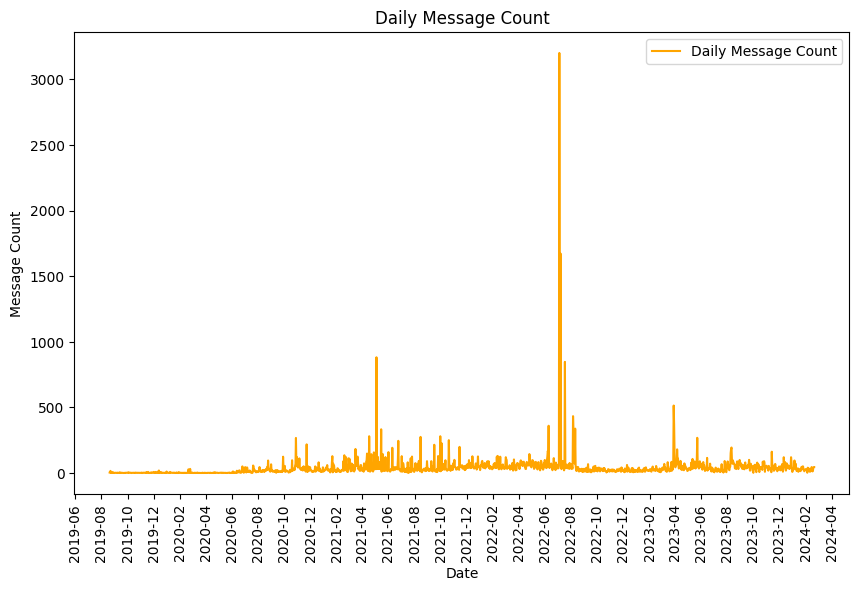

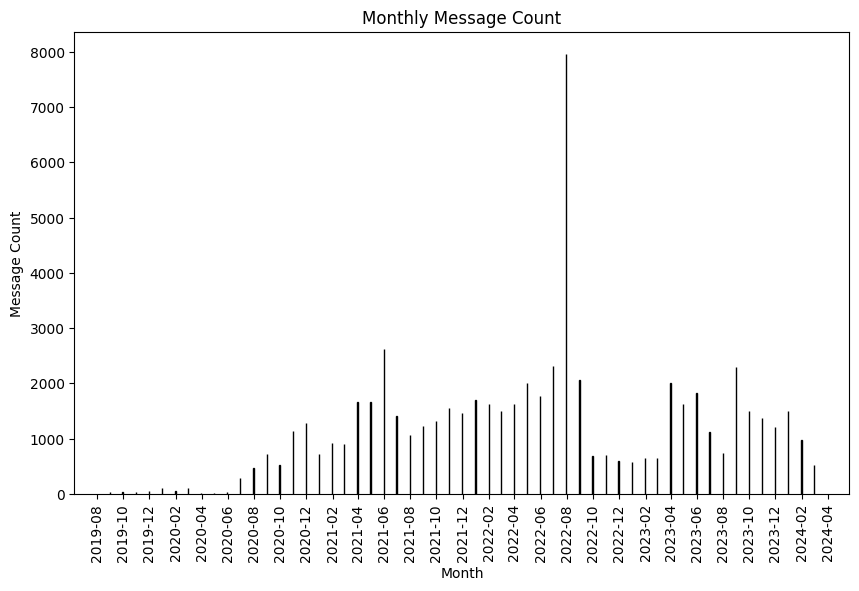

In [269]:
from matplotlib.dates import MonthLocator

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# Create a figure for Daily Message Count
plt.figure(figsize=(10, 6))

# Plot the daily message count
plt.plot(df.set_index('Date')['Content'].resample('D').count(), label='Daily Message Count', color='orange')

# Customize the x-axis ticks to show every month
locator = MonthLocator(interval=2)
plt.gca().xaxis.set_major_locator(locator)

plt.title('Daily Message Count')
plt.xlabel('Date')
plt.ylabel('Message Count')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

# Create a figure for Monthly Message Count
plt.figure(figsize=(10, 6))
monthly_counts = df.set_index('Date')['Content'].resample('M').count()
plt.bar(monthly_counts.index, monthly_counts, color='skyblue', edgecolor='black')

# Customize the x-axis ticks to show every month
locator = MonthLocator(interval=2)
plt.gca().xaxis.set_major_locator(locator)

# Rotate the x-axis tick labels vertically
plt.xticks(rotation='vertical')

plt.title('Monthly Message Count')
plt.xlabel('Month')
plt.ylabel('Message Count')
plt.show()


/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


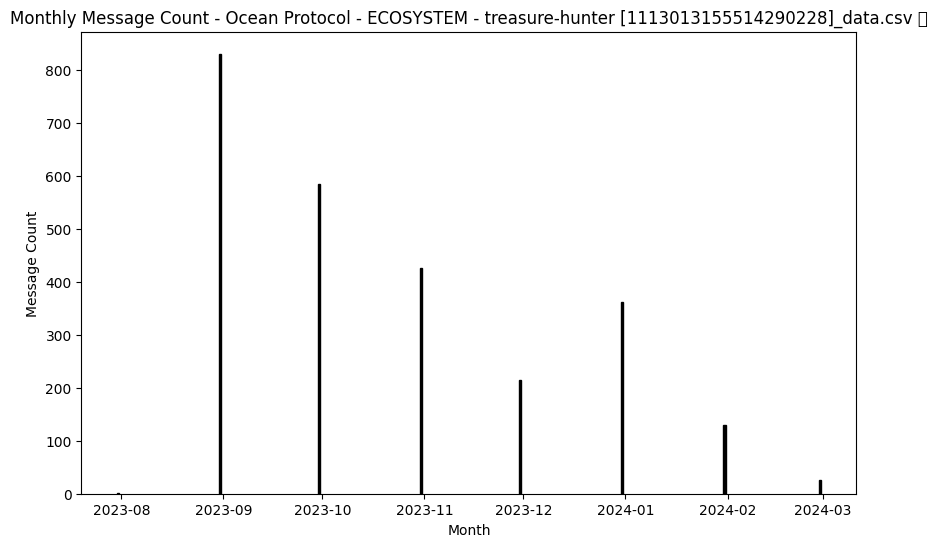

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


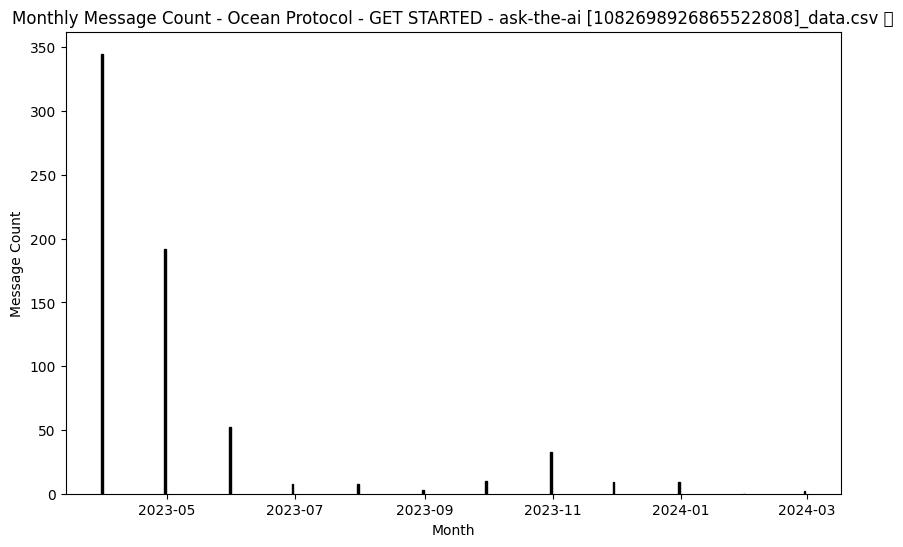

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


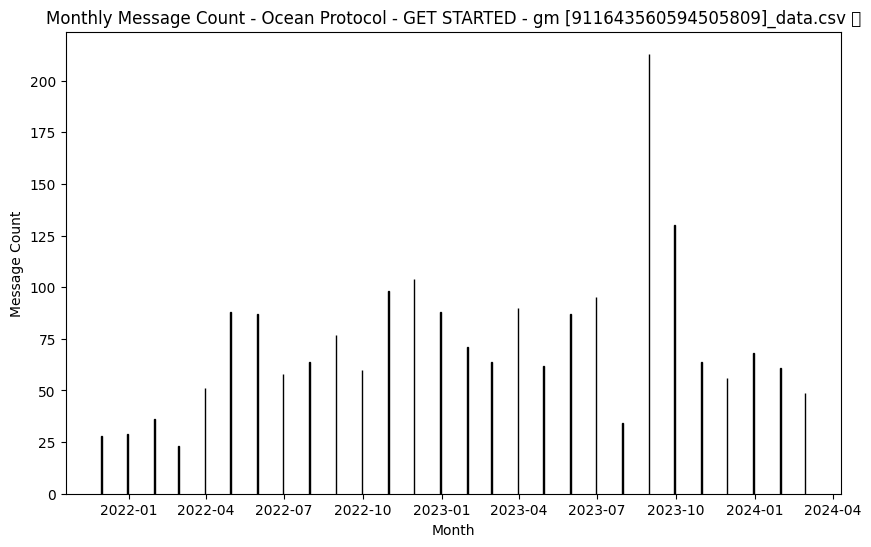

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


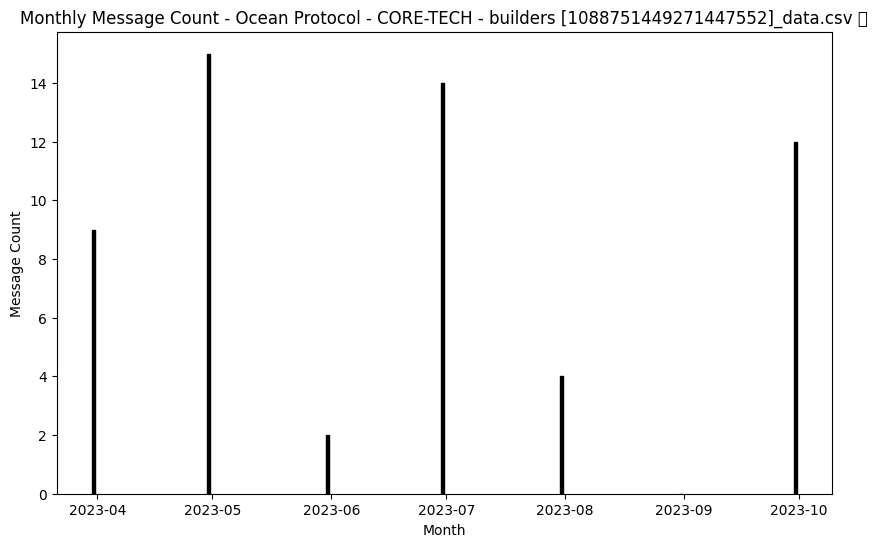

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


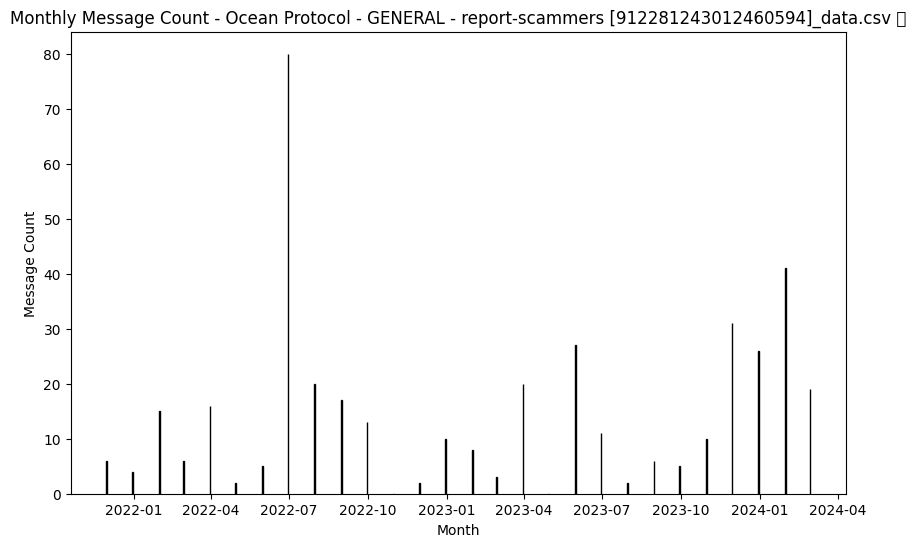

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


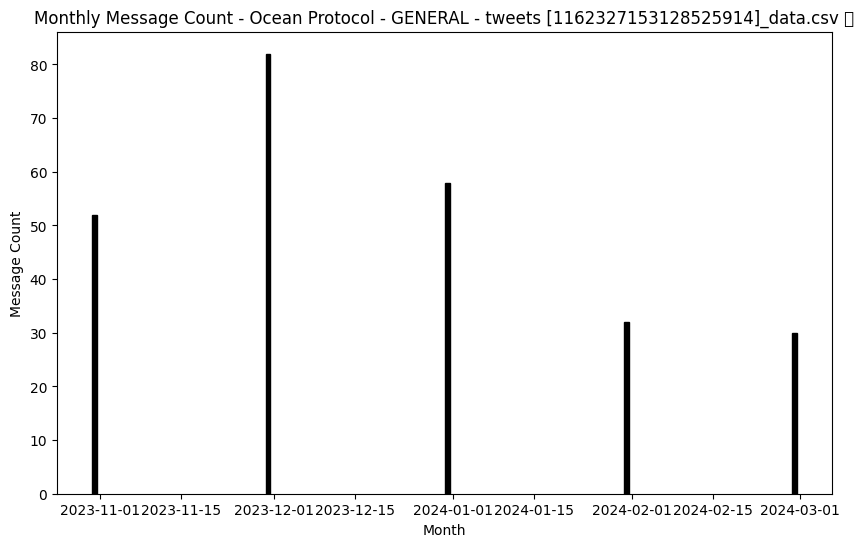

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


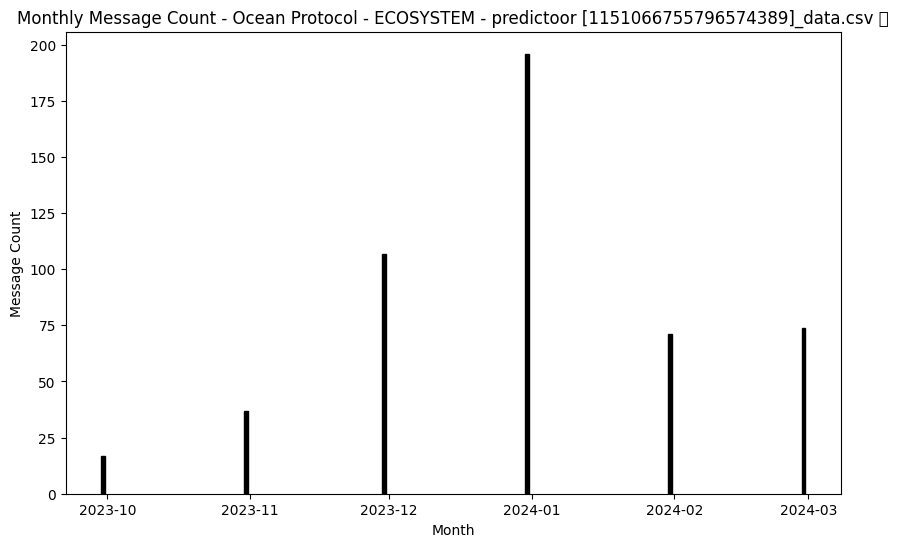

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


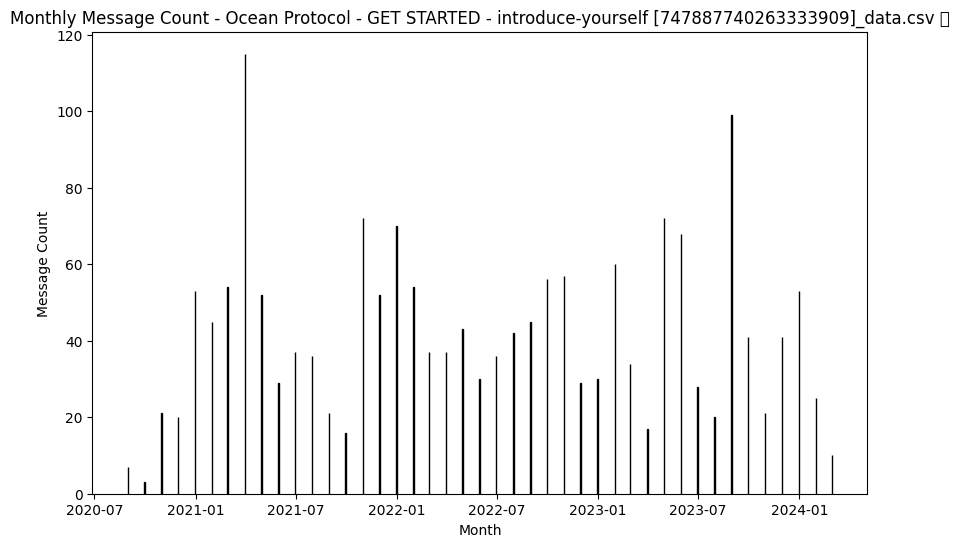

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


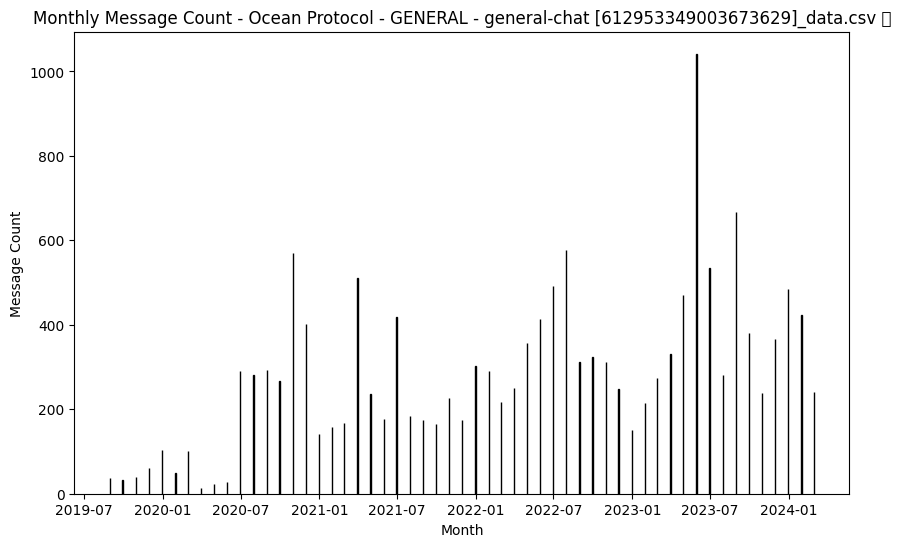

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


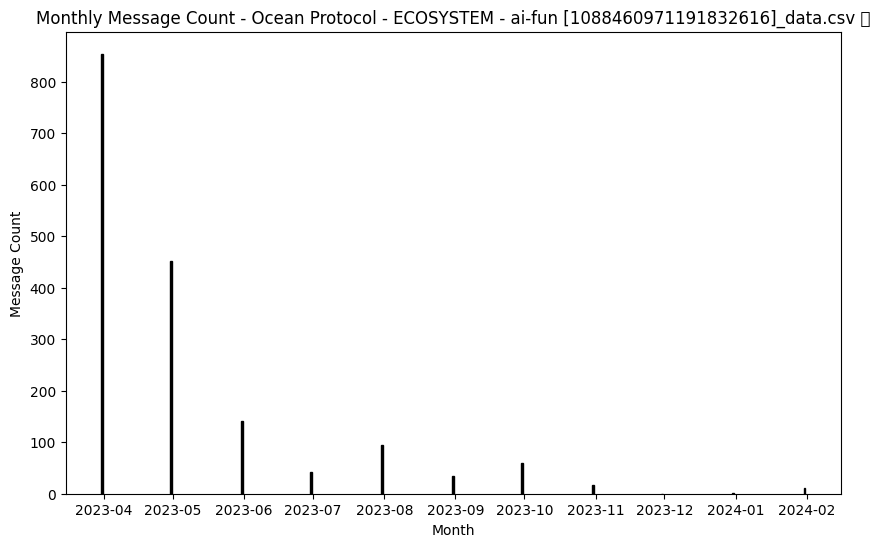

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


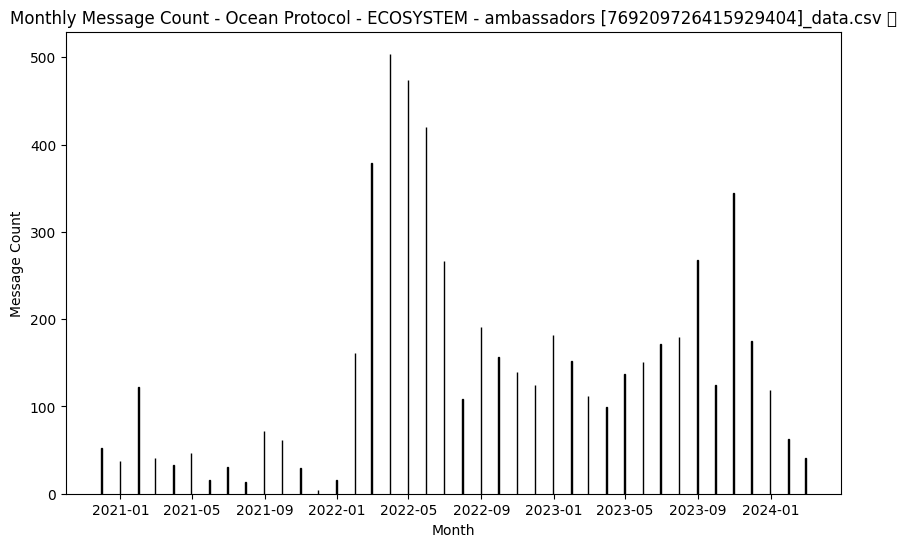

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


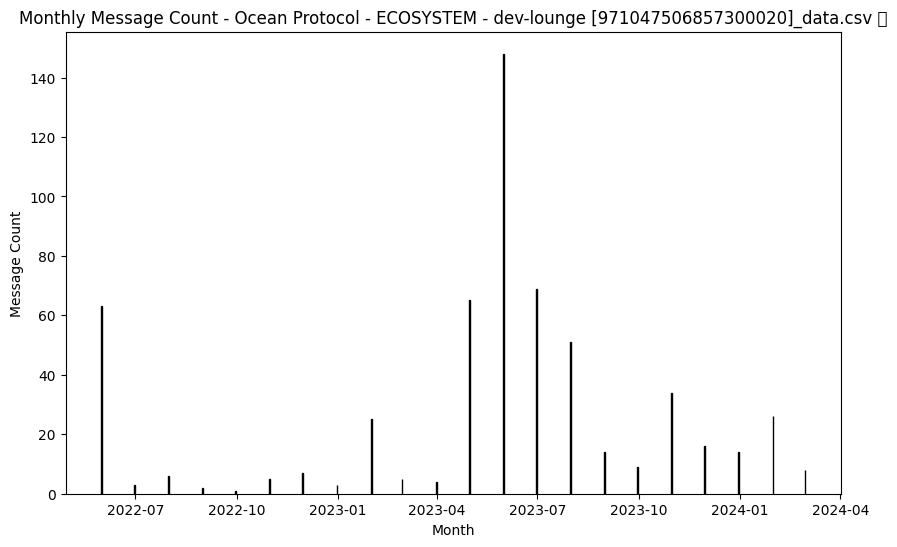

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


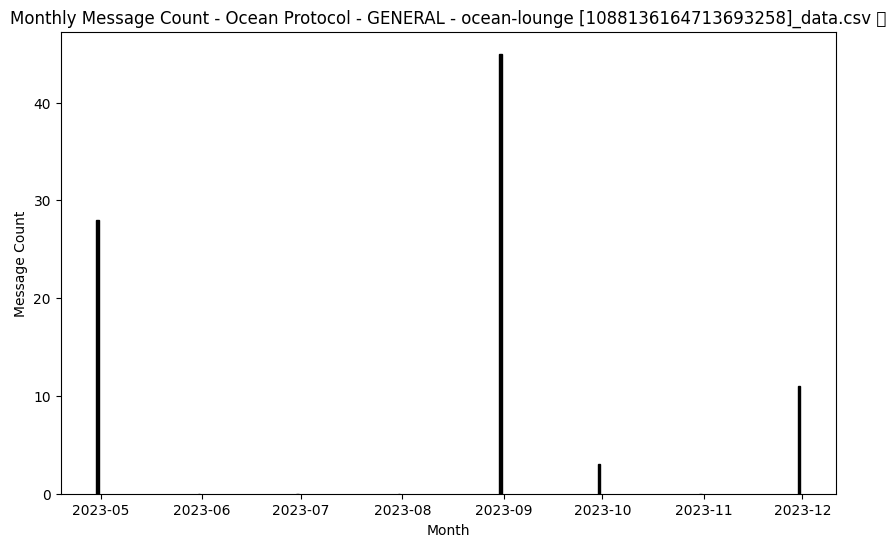

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


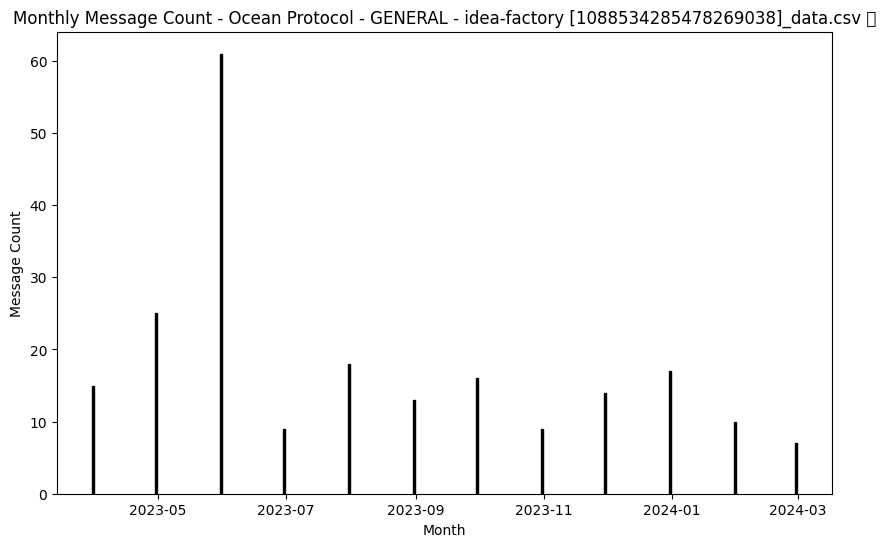

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


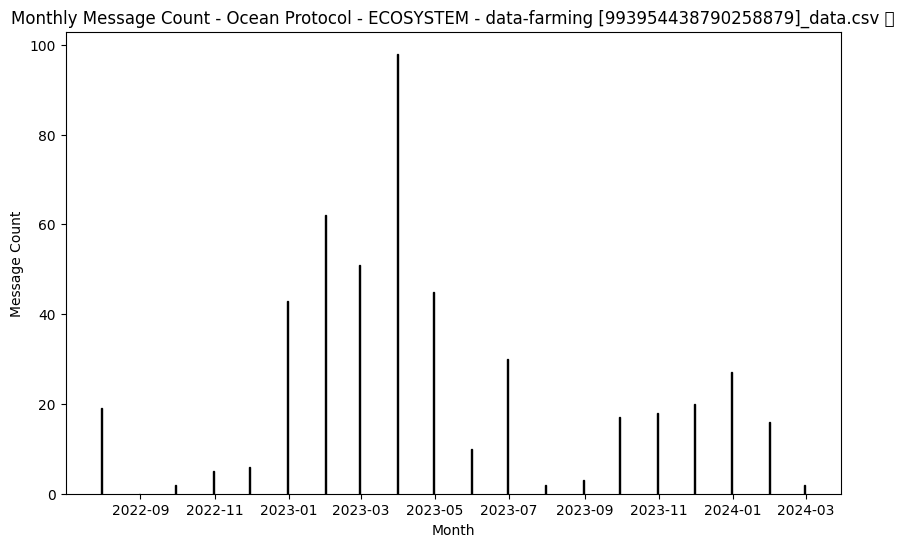

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


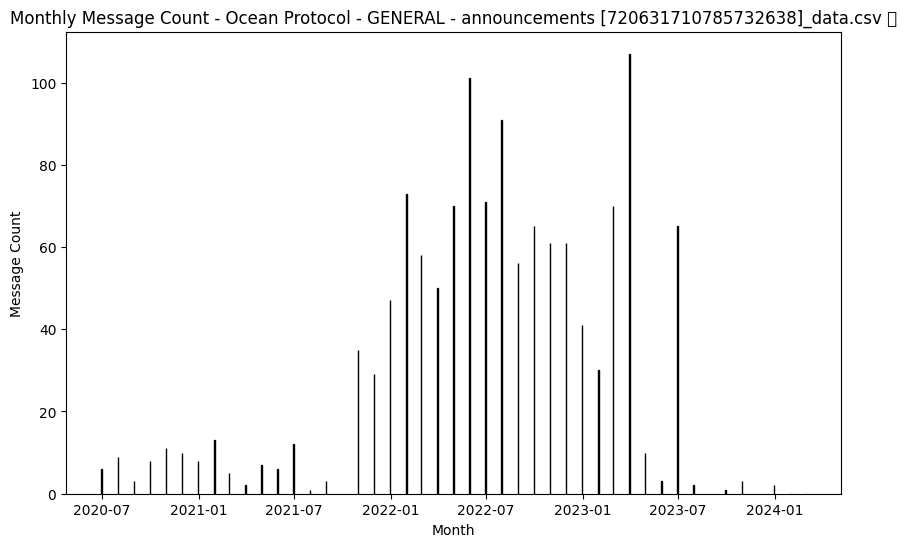

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


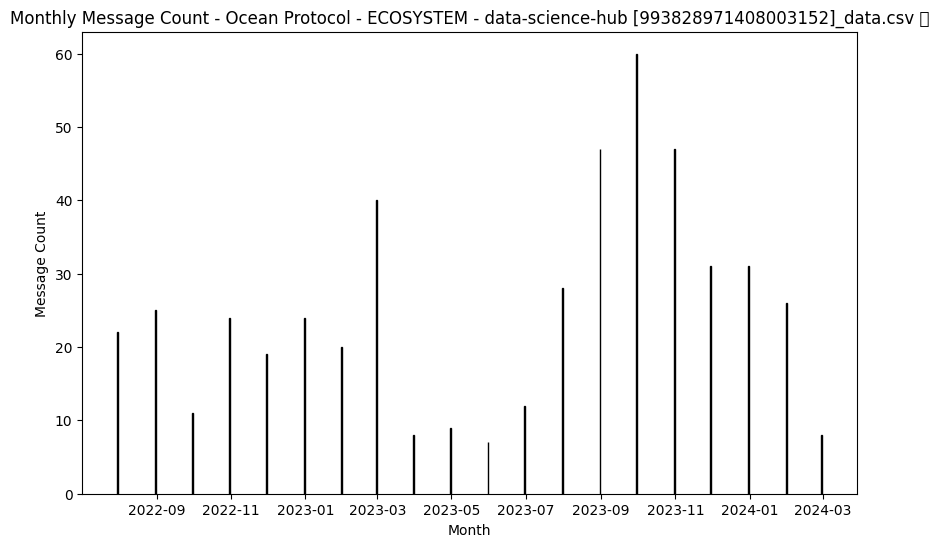

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


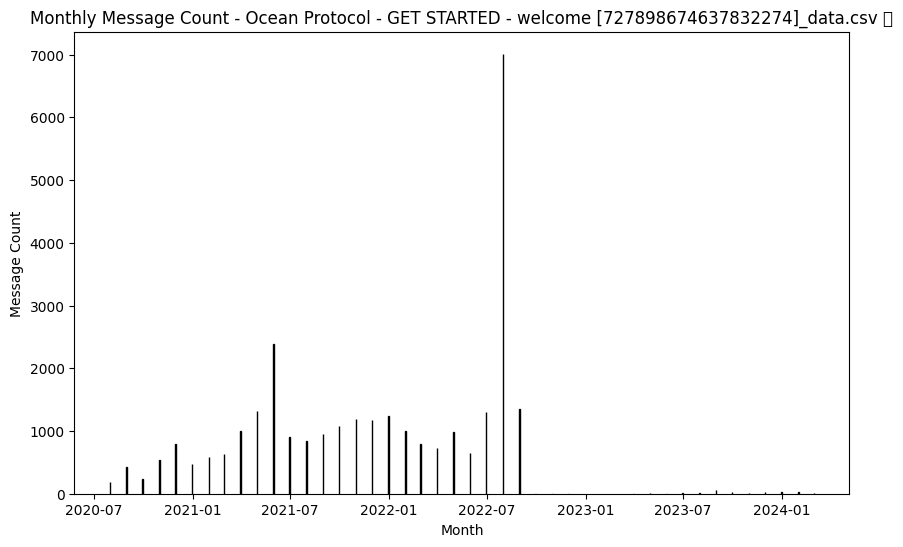

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


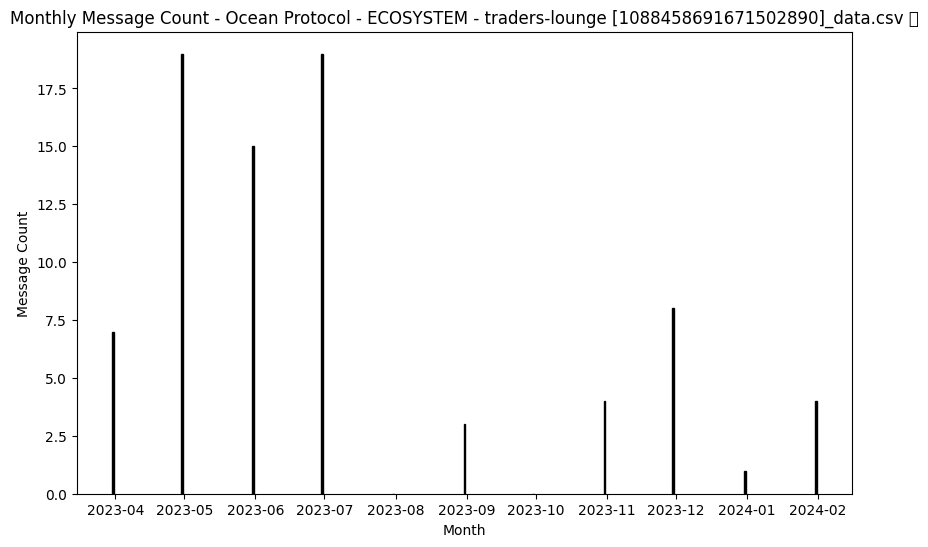

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


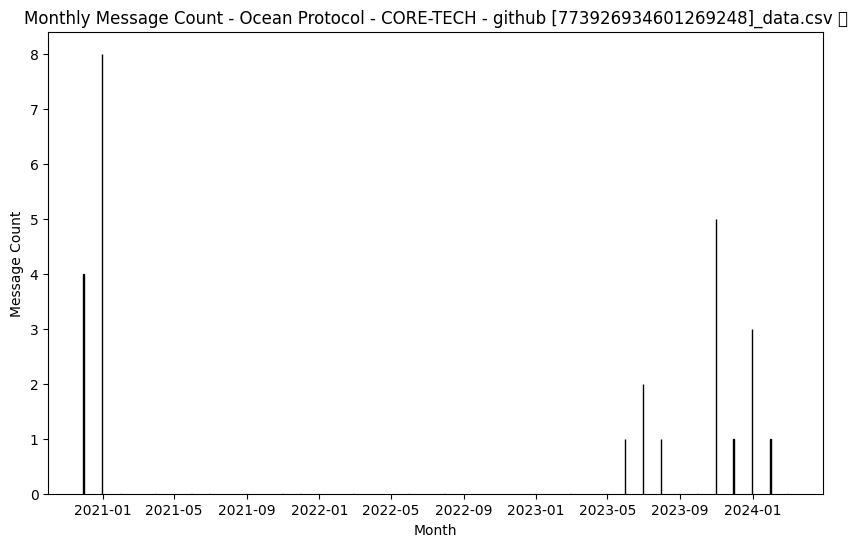

/Users/hugomoura/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


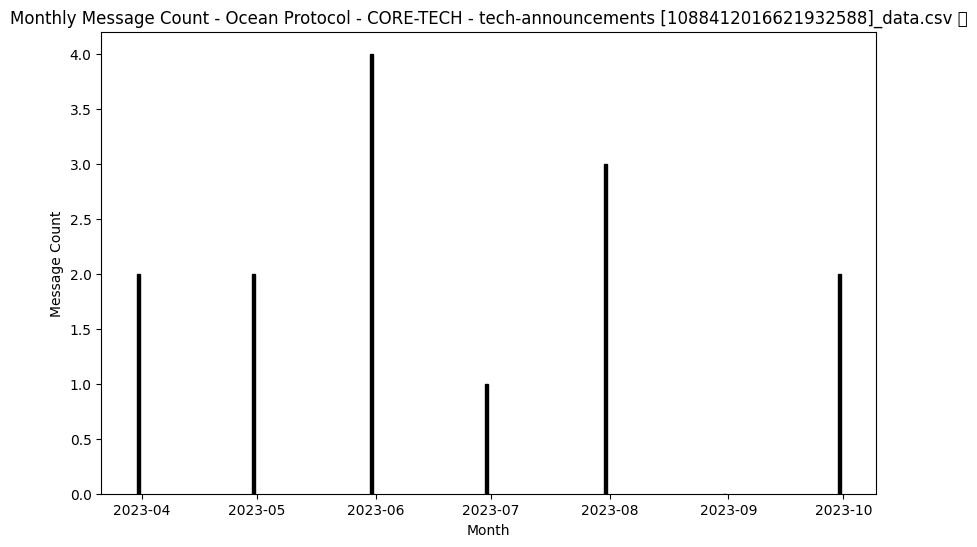

In [271]:
# Specify the path to the folder containing CSV files
folder_path = 'Channels'

# Iterate through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        # Load CSV file into a Pandas DataFrame with 'Channel' as header
        df = pd.read_csv(file_path)

        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

        # Create a figure for Monthly Message Count
        plt.figure(figsize=(10, 6))
        monthly_counts = df.set_index('Date')['Content'].resample('M').count()
        plt.bar(monthly_counts.index, monthly_counts, color='black', edgecolor='black')
        plt.title(f'Monthly Message Count - {filename} \U0001F30A')
        plt.xlabel('Month')
        plt.ylabel('Message Count')
        plt.show()


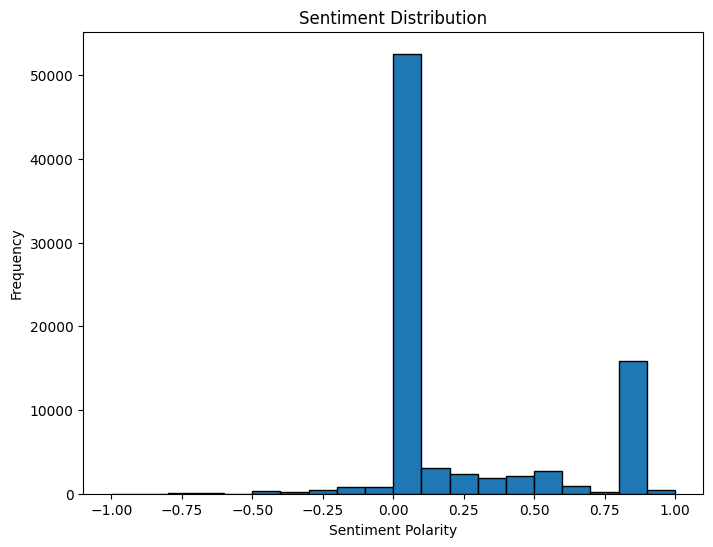

In [188]:
# Check for missing values
df['Content'].fillna('N/A', inplace=True)

# Apply sentiment analysis to 'Content' column
df['sentiment'] = df['Content'].apply(lambda text: TextBlob(text).sentiment.polarity)

# Create a figure for Sentiment Distribution
plt.figure(figsize=(8, 6))

# Plot sentiment distribution
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Show the plot
plt.show()

In [217]:
# Convert 'Date' column to datetime format
#df['Date'] = pd.to_datetime(df['Date'])
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# Check for missing values
df['Content'].fillna('N/A', inplace=True)

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to 'Content' column
df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])
df[['Date', 'Content', 'sentiment']].to_csv('Sentiment/sentiment_scores.csv', index=False)

# Print the DataFrame with sentiment scores
print(df[['Date', 'Content', 'sentiment']])


                     Date                                            Content  \
0     2023-03-29 01:02:00                      gm 👋 :Water_Wave: :Oceancopy:   
1     2023-03-29 16:37:00              Good morning to all the @🧑‍💻Builder 🌊   
2     2023-03-29 16:37:00         **@White Rider just advanced to level 4!**   
3     2023-03-29 16:40:00  https://tenor.com/view/hello-there-baby-yoda-m...   
4     2023-03-29 16:40:00                            Good morning everyone 😀   
...                   ...                                                ...   
84749 2023-12-23 20:25:00                                                N/A   
84750 2024-01-19 20:22:00                                                N/A   
84751 2024-01-30 22:51:00                                                N/A   
84752 2024-02-06 19:05:00                               partnership proposal   
84753 2024-02-06 22:29:00  Thanks for reaching out) \n\nYou can submit yo...   

       sentiment  
0         0.0000  
1

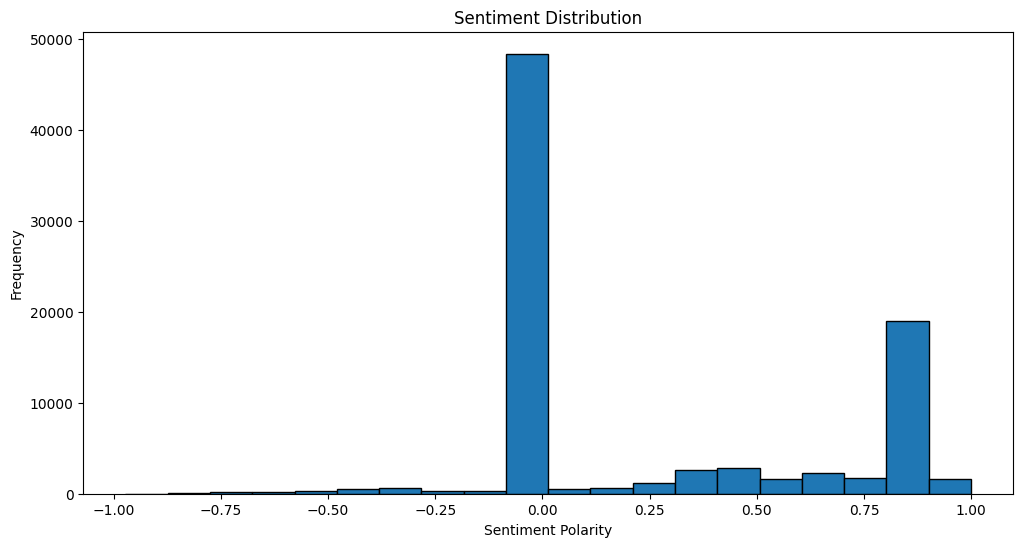

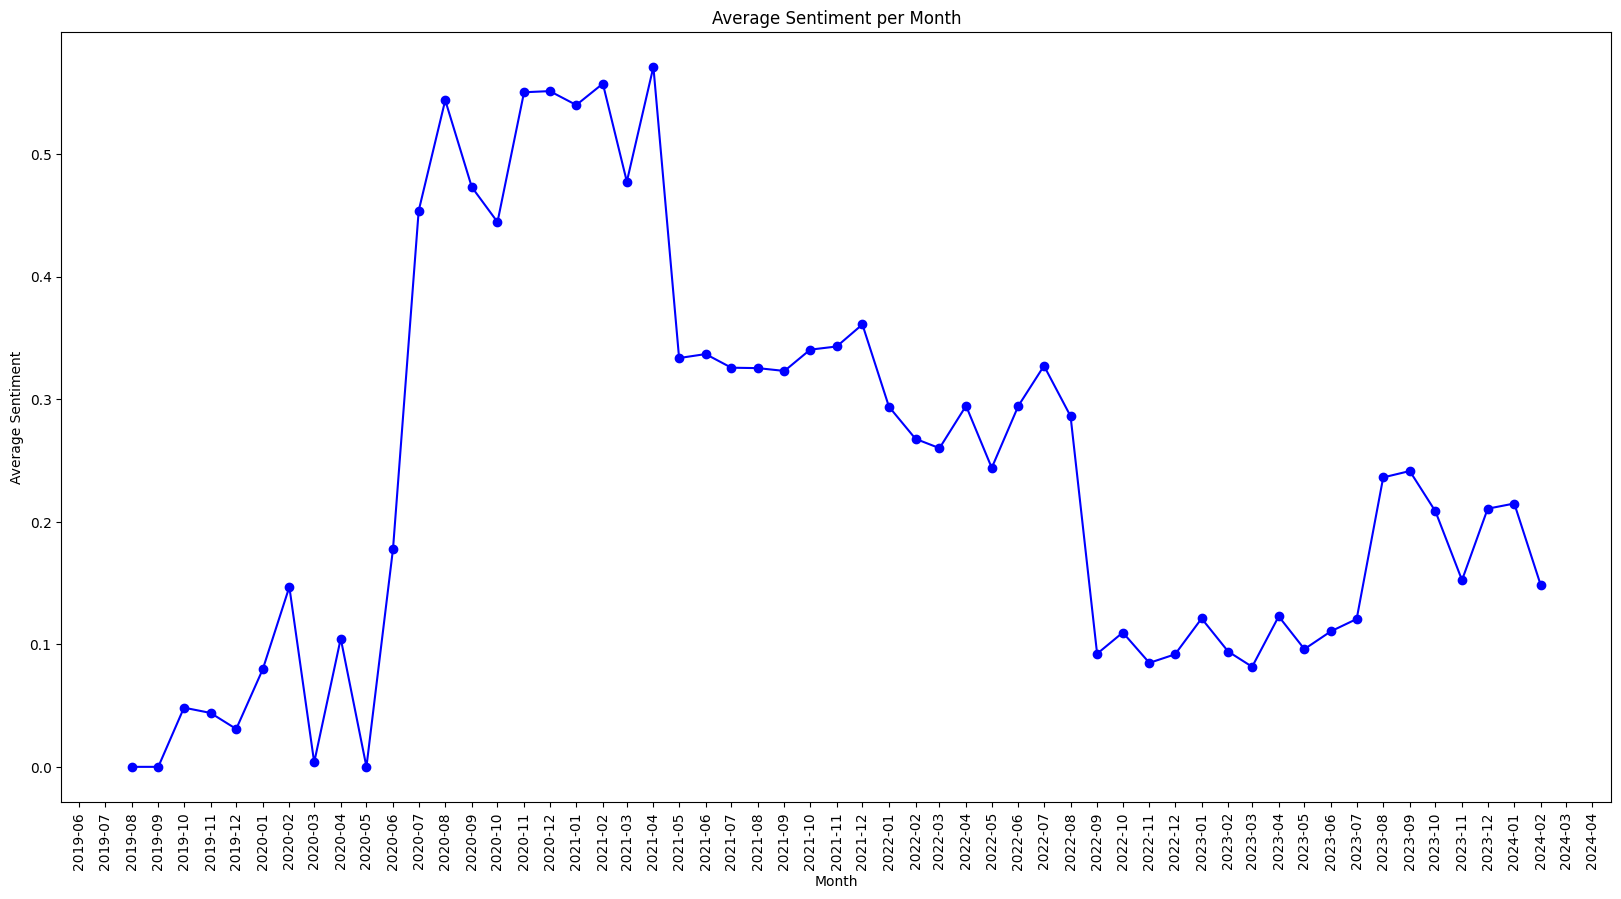

In [278]:
# Assuming you have loaded your DataFrame df
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# Set 'Date' column as the index
df.set_index('Date', inplace=True)

# Check for missing values and fill with 'N/A'
df['Content'].fillna('N/A', inplace=True)

# Create a SentimentIntensityAnalyzer object
sid = SentimentIntensityAnalyzer()

# Apply sentiment analysis to 'Content' column
df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])

# Resample data to monthly frequency and calculate average sentiment
monthly_sentiment = df.resample('MS')['sentiment'].agg(['mean', 'count'])

# Save to CSV file
monthly_sentiment.to_csv('Datasets/Monthly_Sentiment.csv')

# Plot histogram of sentiment scores per month
plt.figure(figsize=(12, 6))
plt.hist(df['sentiment'], bins=20, edgecolor='black')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')

# Plot average sentiment per month
plt.figure(figsize=(20, 10))
plt.plot(monthly_sentiment.index, monthly_sentiment['mean'], marker='o', linestyle='-', color='b')

# Customize the x-axis ticks to show every month
locator = MonthLocator(interval=1)
plt.gca().xaxis.set_major_locator(locator)

plt.title('Average Sentiment per Month')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.xticks(rotation='vertical')

# Show the plot
plt.show()

In [144]:
# Specify the path to the folder containing CSV files
folder_path = 'Channels'
output_folder = 'Plots'
plt.rcParams['font.family'] = 'DejaVu Sans'

# Create the 'plots' folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Iterate through all CSV files in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):
        file_path = os.path.join(folder_path, filename)

        # Load CSV file into a Pandas DataFrame with 'Channel' as header
        df = pd.read_csv(file_path)

        # Convert 'Date' column to datetime format
        df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d %H:%M:%S')

        # Check for missing values and fill with 'N/A'
        df['Content'].fillna('N/A', inplace=True)

        # Create a SentimentIntensityAnalyzer object
        sid = SentimentIntensityAnalyzer()

        # Apply sentiment analysis to 'Content' column
        df['sentiment'] = df['Content'].apply(lambda text: sid.polarity_scores(text)['compound'])

        # Resample data to monthly frequency and calculate average sentiment
        monthly_sentiment = df.groupby(df['Date'].dt.to_period("M")).agg({'sentiment': ['mean', 'count']}).reset_index()

        # Convert 'Date' back to string for plotting
        monthly_sentiment['Date'] = monthly_sentiment['Date'].astype(str)

        # Plot histogram of sentiment scores per month
        plt.figure(figsize=(12, 6))
        plt.hist(df['sentiment'], bins=20, edgecolor='black')
        plt.title(f'Sentiment Distribution - {filename}')
        plt.xlabel('Sentiment Polarity')
        plt.ylabel('Frequency')

        # Save the histogram plot
        output_path_hist = os.path.join(output_folder, f'{filename}_sentiment_distribution.png')
        plt.savefig(output_path_hist)
        plt.close()

        # Plot average sentiment per month
        plt.figure(figsize=(12, 6))
        plt.plot(monthly_sentiment['Date'], monthly_sentiment['sentiment']['mean'], marker='o', linestyle='-', color='b')
        plt.title(f'Average Sentiment per Month - {filename}')
        plt.xlabel('Month')
        plt.ylabel('Average Sentiment')
        plt.xticks(rotation='vertical')

        # Save the average sentiment plot
        output_path_avg = os.path.join(output_folder, f'{filename}_average_sentiment.png')
        plt.savefig(output_path_avg)
        plt.close()


/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/3988073639.py:45: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  plt.savefig(output_path_hist)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/3988073639.py:45: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  plt.savefig(output_path_hist)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/3988073639.py:58: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  plt.savefig(output_path_avg)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/3988073639.py:58: UserWarning: Glyph 65073 (\N{PRESENTATION FORM FOR VERTICAL EM DASH}) missing from current font.
  plt.savefig(output_path_avg)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0000gn/T/ipykernel_51212/3988073639.py:45: UserWarning: Glyph 129698 (\N{KNOT}) missing from current font.
  plt.savefig(output_path_hist)
/var/folders/pp/bdyt1jrd5w5d3twfkg227dtc0

### Correlations

In [220]:
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

# Group by 'Author' and count the number of messages
user_activity = df.groupby('Author')['Content'].count().reset_index(name='MessageCount')

# Sort the dataframe by 'MessageCount' in descending order
user_activity = user_activity.sort_values(by='MessageCount', ascending=False)

user_activity.to_csv('Datasets/User_Activity.csv', index=False)

# Display the result
print(user_activity)

                            Author  MessageCount
1554                     MEE6#4876         17878
891                   Deleted User          5825
3426              blockchainlugano          1199
5847                       kreigdk          1116
4276              dotunwilfred.eth          1048
...                            ...           ...
2442               TweetShift#4434             0
513   Application Bot Premium#7743             0
2468                     Uzox#9688             0
4905                      grgr8280             0
1206                   Harvey#1385             0

[9025 rows x 2 columns]


In [223]:
import pandas as pd

# Load your Discord dataset
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

# Group by 'Author' and count the number of messages
user_activity = df.groupby('Author')['Content'].count().reset_index(name='MessageCount')

# Sort the dataframe by 'MessageCount' in descending order
user_activity = user_activity.sort_values(by='MessageCount', ascending=False)

# Select the top 20 most active users
top_20_users = user_activity.head(20)

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# Filter messages from the top 20 users
top_20_messages = df[df['Author'].isin(top_20_users['Author'])]

# Group by 'Author' and 'Date', count the number of messages per day for each user
user_daily_message_count = top_20_messages.groupby(['Author', df['Date'].dt.date])['Content'].count().reset_index(name='DailyMessageCount')

# Calculate the average daily message count for each user
avg_daily_message_count_per_user = user_daily_message_count.groupby('Author')['DailyMessageCount'].mean().reset_index(name='AvgDailyMessageCount')

# Display the result
print(avg_daily_message_count_per_user)


                 Author  AvgDailyMessageCount
0          Deleted User             12.085062
1             MEE6#4876             15.385542
2   OceanDiffusion#4502              7.494118
3         OceanGPT#0740              5.473684
4             alexcos20              4.580247
5            bhavingala              2.546599
6         bigimeyagazzz              9.678571
7            birususama              1.701587
8      blockchainlugano              3.090206
9           denkobetona              2.363636
10               doteth              2.538760
11     dotunwilfred.eth              2.646465
12            hanadi.fh              1.993333
13              kreigdk              5.967914
14         lukas85#6738             16.244898
15              mickssp              1.690722
16                qazim              1.827751
17         robinlehmann              2.406780
18         white_rider_              3.886364
19            zippy1979              3.776316


In [242]:
import pandas as pd

# Load your Discord dataset
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# List of authors
authors = ['MEE6#4876', 'Deleted User', 'blockchainlugano', 'kreigdk', 'dotunwilfred.eth', 'bhavingala',
           'zippy1979', 'robinlehmann', 'lukas85#6738', 'doteth', 'OceanDiffusion#4502', 'bigimeyagazzz',
           'birususama', 'white_rider_', 'qazim', 'alexcos20', 'mickssp', 'denkobetona', 'OceanGPT#0740', 'hanadi.fh,299']

# Create an empty list to store dictionaries
result_data = []

# Loop through each author
for author in authors:
    # Filter messages by the current author
    author_df = df[df['Author'] == author]
    
    # Extract the relevant information for the current author
    author_info = {
        'Author': author,
        'Dates': author_df['Date'].dt.strftime('%Y-%m-%d').tolist(),  # Format date as YYYY-MM-DD
        'Messages': author_df['Content'].tolist()
    }
    
    # Append the result to the list as a dictionary
    result_data.append(author_info)

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)

# Save the DataFrame to a CSV file
result_df.to_csv('most_active_authors_messages.csv', index=False)


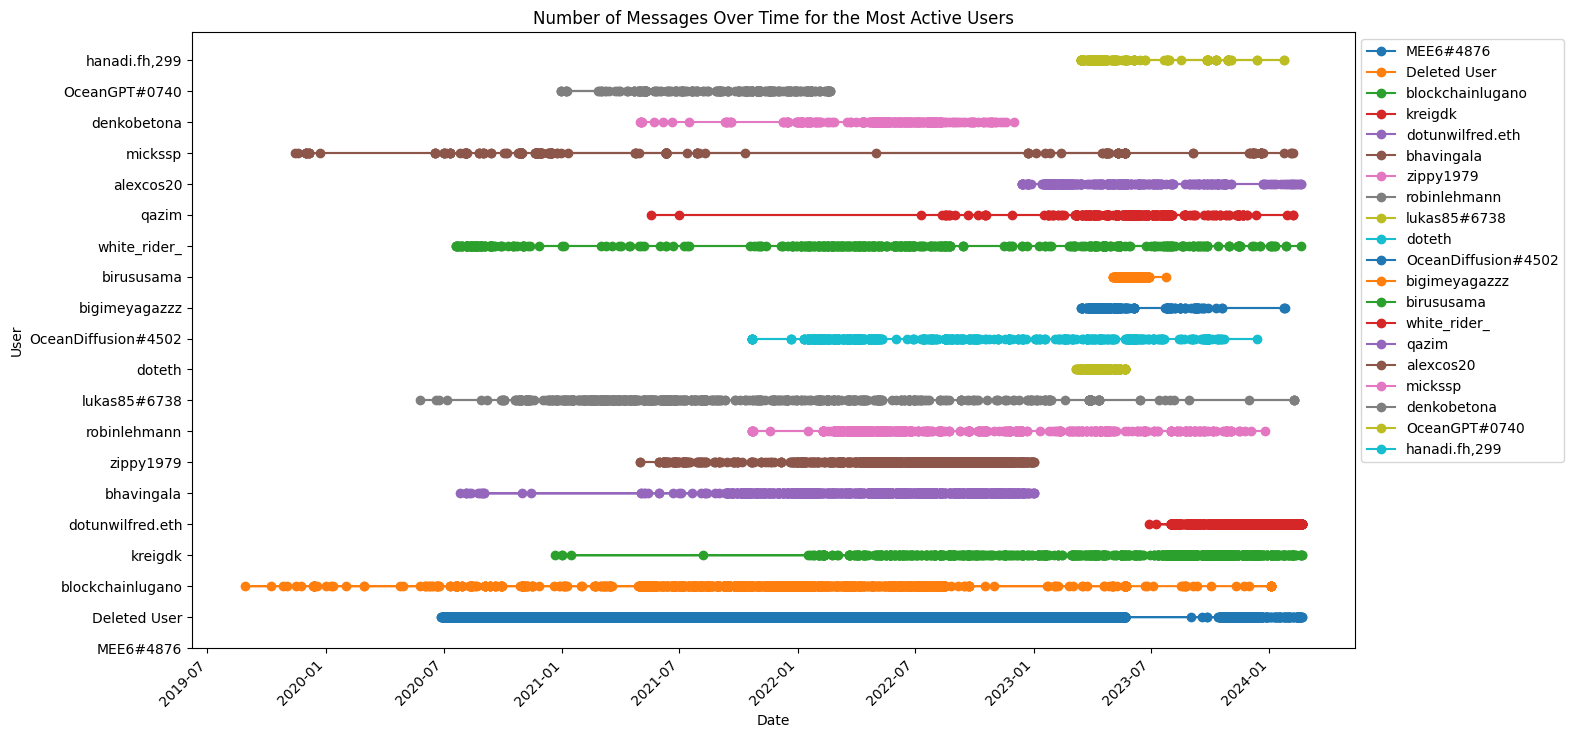

In [253]:
# Load the CSV file with the most active authors and their messages
result_df = pd.read_csv('most_active_authors_messages.csv')

# Convert the 'Dates' column to a list of lists of datetime objects
result_df['Dates'] = result_df['Dates'].apply(eval)
result_df['Dates'] = result_df['Dates'].apply(lambda dates: [pd.to_datetime(date) for date in dates])

# Create a numeric label for each author
result_df['NumericLabel'] = range(1, len(result_df) + 1)

# Plot the number of messages for each author over time
plt.figure(figsize=(15, 8))

for _, row in result_df.iterrows():
    plt.plot(row['Dates'], [row['NumericLabel']+1] * len(row['Dates']), 'o-', label=row['Author'])

plt.title('Number of Messages Over Time for the Most Active Users')
plt.xlabel('Date')
plt.ylabel('User')
plt.yticks(result_df['NumericLabel'], result_df['Author'])
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()



In [231]:
# Load your Discord dataset
df = pd.read_csv('Datasets/Ocean Discord Data Challenge Dataset.csv')

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M %p')

# List of authors
authors = ['MEE6#4876', 'Deleted User', 'blockchainlugano', 'kreigdk', 'dotunwilfred.eth', 'bhavingala',
           'zippy1979', 'robinlehmann', 'lukas85#6738', 'doteth', 'OceanDiffusion#4502', 'bigimeyagazzz',
           'birususama', 'white_rider_', 'qazim', 'alexcos20', 'mickssp', 'denkobetona', 'OceanGPT#0740']

# Create an empty list to store dictionaries
result_data = []

# Loop through each author
for author in authors:
    # Filter messages by the current author
    author_df = df[df['Author'] == author]
    
    # Group by 'Date' and count the number of messages
    daily_activity = author_df.groupby(df['Date'].dt.date).size().reset_index(name='MessageCount')
    
    # Find the date with the most messages
    most_active_date = daily_activity.loc[daily_activity['MessageCount'].idxmax()]
    
    # Append the result to the list as a dictionary
    result_data.append({'Author': author, 'MostActiveDate': most_active_date['Date'],
                        'MessageCount': most_active_date['MessageCount']})

# Create a DataFrame from the list of dictionaries
result_df = pd.DataFrame(result_data)

# Display the result
print(result_df)


                 Author MostActiveDate  MessageCount
0             MEE6#4876     2022-07-05          1556
1          Deleted User     2022-07-05          1220
2      blockchainlugano     2023-08-11            42
3               kreigdk     2023-12-28            31
4      dotunwilfred.eth     2022-07-22            13
5            bhavingala     2022-04-08            11
6             zippy1979     2022-03-02            25
7          robinlehmann     2022-06-22            28
8          lukas85#6738     2023-03-29           198
9                doteth     2022-02-09            18
10  OceanDiffusion#4502     2023-03-29           119
11        bigimeyagazzz     2023-05-12            25
12           birususama     2023-04-06             9
13         white_rider_     2023-05-29            28
14                qazim     2023-10-24             9
15            alexcos20     2020-10-28           101
16              mickssp     2022-05-03             6
17          denkobetona     2022-02-17        